# Problem Statement:

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing the sales of their products.

The dataset includes two files:

- bigdatamart_Train.csv: Use this file for the model building purpose. 

- bigdatamart_Test.csv: Use this file for getting predictions from the trained model. 

In [1]:
## Importing necessary libraries:
import pandas as pd
import numpy as np


In [2]:
df_train=pd.read_csv('bigdatamart_Train.csv')
df_test=pd.read_csv('bigdatamart_Test.csv')
print('Training Data : ')
print('-'*60)
df_train.head()



Training Data : 
------------------------------------------------------------


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [113]:
print('Testing Data : \n ')
print('-'*60)
df_test.tail()

Testing Data : 
 
------------------------------------------------------------


,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
5676,10.5,Regular,0.013496,Snack Foods,141.3154,1997,Small,Tier 1,Supermarket Type1
5677,7.6,Regular,0.142991,Starchy Foods,169.1448,2009,Medium,Tier 3,Supermarket Type2
5678,10.0,Low Fat,0.073529,Health and Hygiene,118.7440,2002,NaN,Tier 2,Supermarket Type1
5679,15.3,Regular,0.000000,Canned,214.6218,2007,NaN,Tier 2,Supermarket Type1
5680,9.5,Regular,0.104720,Canned,79.7960,2002,NaN,Tier 2,Supermarket Type1


In [4]:
print('Shape of training data : ', df_train.shape)
print('Shape of testing data : ', df_test.shape)

Shape of training data :  (8523, 12)
Shape of testing data :  (5681, 11)


Training dataset has 8523 rows and 12 columns including target.

Testing dataset has 5681 rows and 11 columns. Testing dataset has not target variable i.e. we have to build the model based on training dataset and then predict 

In [5]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline

In [6]:
print('Training Data : ')
print('-'*60)
df_train.describe()

Training Data : 
------------------------------------------------------------


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [7]:
print('Testing Data : ')
print('-'*60)
df_test.describe()

Testing Data : 
------------------------------------------------------------


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


# Observation of Statistics:
- we can see that  after df.describe method we can't find much information of our data set. But here one think to notice that seems there are big number of null values present in our datasets.
- `Item_Visibility` has a min value of zero. This makes no practical sense because when a product is being sold in a store, the visibility cannot be 0.
- `Outlet_Establishment_Years` vary from 1985 to 2009.
Let's confirm the nulls.

In [8]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In training dataset `Item_Weight` and `Outlet_Size` columns have 1463 and 2410 nulls present respectively.

In [9]:
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In testing dataset has also nulls present in `Item_Weight` and `Outlet_Size` columns.
    
    There are huge number of nulls present in both dataset.

## Checking More about Our Dataset's column.

In [10]:
print('Training Data : ')
print('-'*60)
print(df_train.info())
print('\n')
print('Testing Data : ')
print('-'*60)
print(df_test.info())

Training Data : 
------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), o

Both dataset's columns are similar Datatype present.

## About the columns:
###### `Object_Dtype`:-
- `Item_Identifier`:- It si unique indentification for one product.
- `Item_Fat_Content`:- Almost every food items do present some fat. Some items have high fat or some items have low fat and some are regular fat.
- `Item_Type`:- The types of item i.e. it is for drink or feed.
- `Outlet_Size`:- It is size of outlet of store or warehouse.
- `Outlet_Location_Type`:- store location present in which city like tier1 city/tier2 city/tier3city
- `Outlet_Type`:- types of retail outlet like supermarket/grocery/departmental etc

###### ` Float_Dtype`:-
- `Item_Weight`:- Weight of the Item.
- `Item_visibility`:- The visibility property sets or returns whether an element should be visible. The visibility property allows the author to show or hide an element. It is similar to the display property.
- `Item_MRP`:-Maximum Retail Price-A maximum retail price is an upper limit on the price of a good set by the manufacturer or distributor of a good on retailers or final point-of-sale purchases.

###### ` Integer Dtype`:-
- `Outlet_Estabishment_Year`:-year of establishment simply refers to when a business starts operation while year of incorporation is when a business gets legal backing to carry out its operations.


In [11]:
df_train.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


## Observation:
- All the variables have very less correlation between each other
- Only atypical is Item_MRP and Item_Outlet_Sales which shows significant 56.7% correlated.

In [12]:
## checking unique value present in training dataset:-
df_train.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

## Checking the Unique value of object datatype columns:

In [13]:
for  i in df_train.columns.tolist():
    if df_train[i].dtype=='object':
        print(df_train[i].value_counts(),'\n')

FDW13    10
FDG33    10
FDQ40     9
FDV60     9
NCY18     9
         ..
FDY43     1
FDN52     1
FDC23     1
DRF48     1
FDO33     1
Name: Item_Identifier, Length: 1559, dtype: int64 

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64 

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64 

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64 

Mediu

# Observation:-
- Item identifier column has 1559 unique values and item identifier is only a kind of ID of any product, it will not help to predict the sales so that's why somewhere we will drop this.
- Similary Outlet_Identifier is a kind of serial no. or ID number of any warehouse/Store so we will also drop it.
- `Item_Fat_Contain` has only two category `Low Fat` and `Regular`.But here we can see that repeating category with duplicate names.


In [14]:
df_train=df_train.drop(columns=['Item_Identifier','Outlet_Identifier'],axis=1)
df_test=df_test.drop(columns=['Item_Identifier','Outlet_Identifier'],axis=1)

## Combining Datasets:
Above we saw that both datasets have good amount amount of missing value presents. So Now we will combine both dataset and then remove the missing values and visualize the dataset.

In [53]:
df=pd.concat([df_train,df_test],ignore_index=True)
print('New_Shape of combined dataset: ', df.shape)
df


New_Shape of combined dataset:  (14204, 10)


,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,NaN,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...
14199,10.50,Regular,0.013496,Snack Foods,141.3154,1997,Small,Tier 1,Supermarket Type1,NaN
14200,7.60,Regular,0.142991,Starchy Foods,169.1448,2009,Medium,Tier 3,Supermarket Type2,NaN
14201,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,2002,NaN,Tier 2,Supermarket Type1,NaN
14202,15.30,Regular,0.000000,Canned,214.6218,2007,NaN,Tier 2,Supermarket Type1,NaN


## Distribution of continuous data:


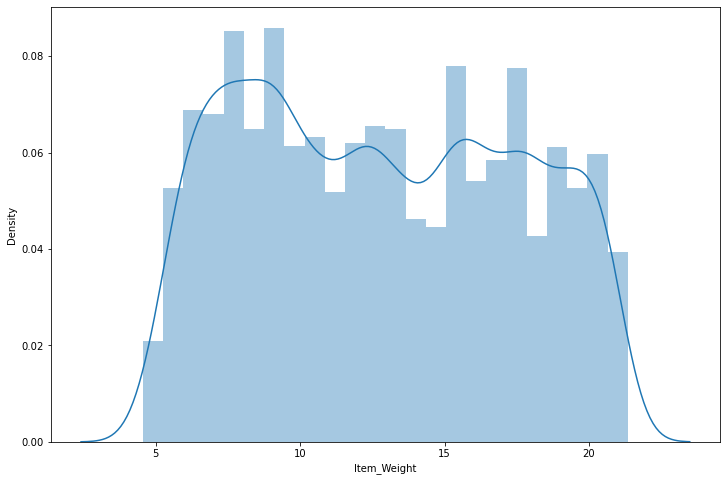

In [54]:
plt.figure(figsize=(12,8))
sns.distplot(df['Item_Weight'])
import warnings as war
war.filterwarnings('ignore')

<AxesSubplot:xlabel='Item_Weight'>

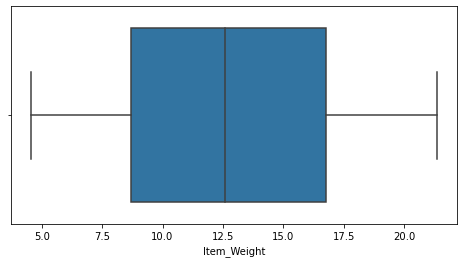

In [55]:
plt.figure(figsize=(8,4))
sns.boxplot(df['Item_Weight'])

<AxesSubplot:xlabel='Item_MRP'>

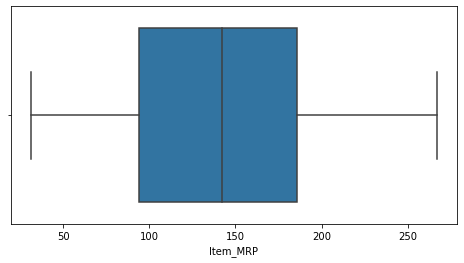

In [56]:
plt.figure(figsize=(8,4))
sns.boxplot(df['Item_MRP'])

<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

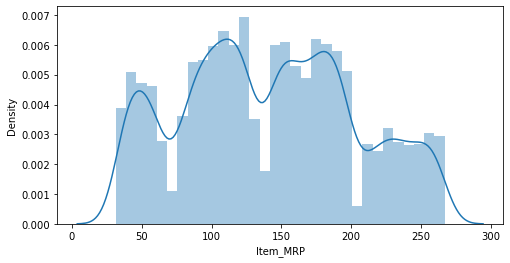

In [57]:
plt.figure(figsize=(8,4))
sns.distplot(df['Item_MRP'])

# Observation:-
- There are only two columns `Item_MRP`and `Item_Weight` have a continous data.
- Both the columns are quite perfectly distributed.
- Though there are not any outlier present in both columns so now we can fill the missing  values.







In [58]:
df.isnull().sum()

Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

# Filling the Missing data:
- `Item-Weight` column has a continuos data therefore we will impute missing value with mean value.
- `Outlet-Size` is a categorical column, therefore we will impute missing values with Medium the mode value.
- `Item_Outlet_Sales`- we have not present the Target column i.e. Item_Outlet_Sales in Test datasetas as we combine train and test data for EDA purpose that's why there are showing 5681 missing values.


In [59]:
df['Outlet_Size']=df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0])

In [60]:
df['Item_Weight']=df['Item_Weight'].fillna(df['Item_Weight'].mean())
df.isna().sum()

Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

- `Item_Visibility`:- as we see df.describe() method that some rows have item_visibility is 0, it can't be accepted because in this world every thing has its visibility. As Item_Visibility is a continuous data so we will simply fill the 0 by its mean().

In [61]:
df[df['Item_Visibility']==0]

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,19.200000,Regular,0.0,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.930000,Low Fat,0.0,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052
5,10.395000,Regular,0.0,Baking Goods,51.4008,2009,Medium,Tier 3,Supermarket Type2,556.6088
10,11.800000,Low Fat,0.0,Fruits and Vegetables,45.5402,1999,Medium,Tier 1,Supermarket Type1,1516.0266
32,18.700000,Low Fat,0.0,Snack Foods,256.6672,2009,Medium,Tier 3,Supermarket Type2,3068.0064
...,...,...,...,...,...,...,...,...,...,...
14166,12.792854,Regular,0.0,Fruits and Vegetables,244.3512,1985,Small,Tier 1,Grocery Store,NaN
14171,12.792854,Regular,0.0,Canned,187.5240,1985,Medium,Tier 3,Supermarket Type3,NaN
14177,7.275000,Low Fat,0.0,Snack Foods,144.5760,1987,High,Tier 3,Supermarket Type1,NaN
14184,12.792854,Low Fat,0.0,Soft Drinks,155.7972,1985,Medium,Tier 3,Supermarket Type3,NaN


There are 879 rows present where Item_visibility has zero.

In [62]:
df['Item_Visibility']=df['Item_Visibility'].replace(0,np.nan)
df['Item_Visibility'].isna().sum()

879

In [63]:
## filling the missing value
df['Item_Visibility']=df['Item_Visibility'].fillna(df['Item_Visibility'].mean())
df.isna().sum()

Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [64]:
# Let's check the  unique value for Item_Fat_content
df['Item_Fat_Content'].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [65]:
## Replacing LF reg low gat with One low fat and one regular category.
df['Item_Fat_Content']=df['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})
df['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

# Data Visualization:

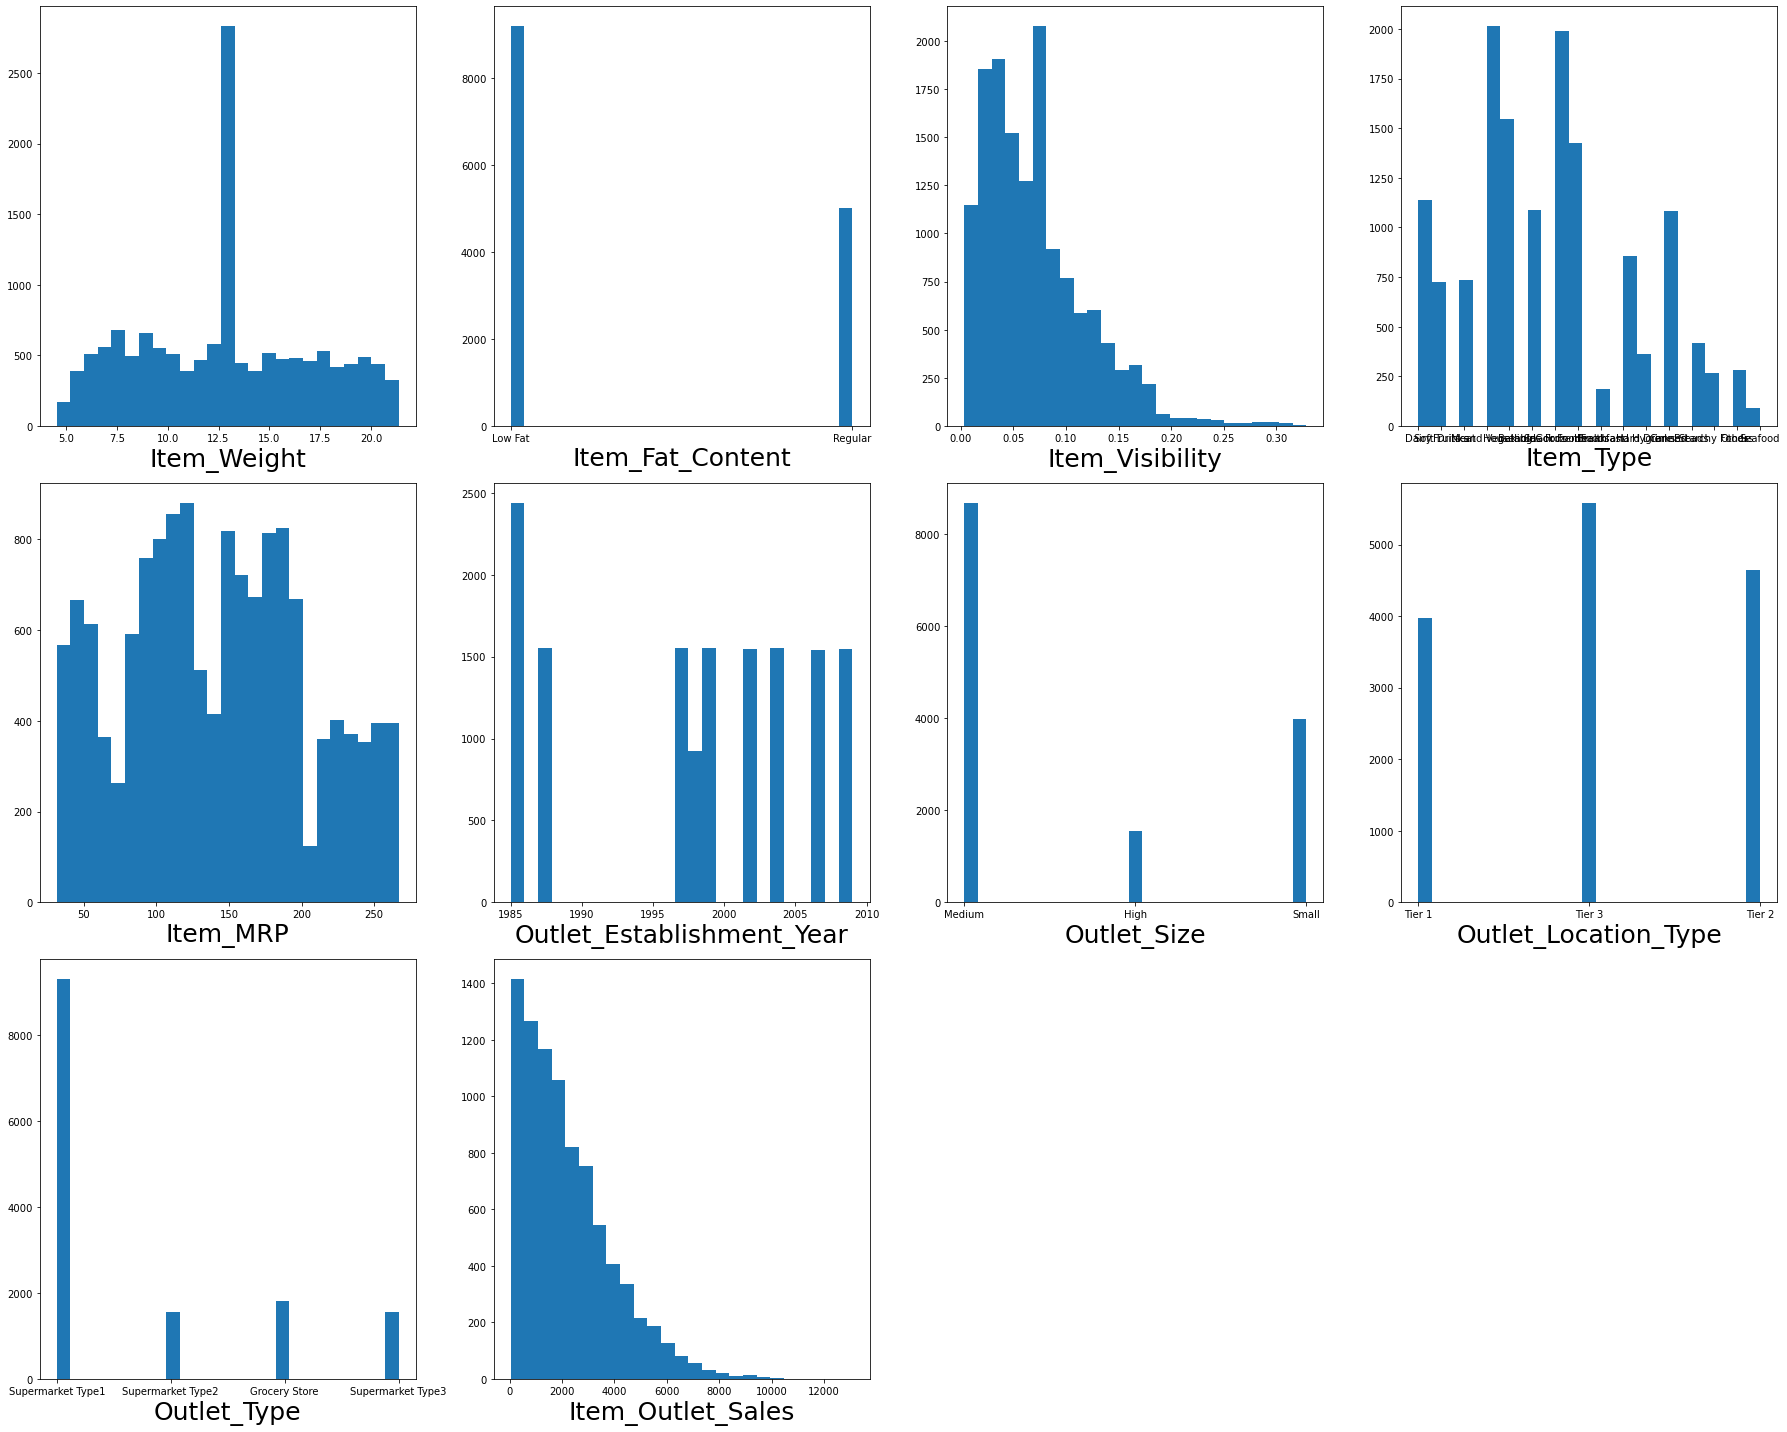

In [66]:
plt.figure(figsize=(25,20))
plotnumber=1
for column in df:
    if plotnumber<=30:
        ax=plt.subplot(3,4,plotnumber)
        plt.hist(df[column],bins=25)
        plt.xlabel(column,fontsize=25)
    plotnumber+=1
plt.tight_layout()

# Observation:
- Item_Outlet_Sales are our target it is positive skewed, because these are 5681 null values.
- Item_visibility column is also positive skewed, we have to check it's skewness.

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

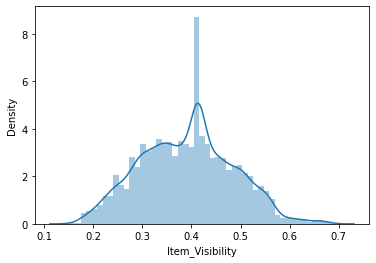

In [67]:
df['Item_Visibility']=np.cbrt(df['Item_Visibility'])
sns.distplot(df['Item_Visibility'])

After applying cube root function on Item_visibilty. it's distribution seems perfectly fine now.

### 'Outlet_Establishment_Year
outlet_Establishment_year column is useless column till now,so now we are making a new column with the age the new name will be Outlet_Age.

The new column has a age of the outlet stores till now.

In [68]:
df['Outlet_Establishment_Year'].value_counts()

1985    2439
1987    1553
2004    1550
1997    1550
1999    1550
2002    1548
2009    1546
2007    1543
1998     925
Name: Outlet_Establishment_Year, dtype: int64

In [69]:
age=[]
for i in df['Outlet_Establishment_Year']:
    age.append(2022-i)

len(age)

14204

In [70]:
df['Outlet_Age']=age
df['Outlet_Age'].value_counts()

37    2439
35    1553
25    1550
18    1550
23    1550
20    1548
13    1546
15    1543
24     925
Name: Outlet_Age, dtype: int64

<AxesSubplot:xlabel='Outlet_Age', ylabel='Item_Outlet_Sales'>

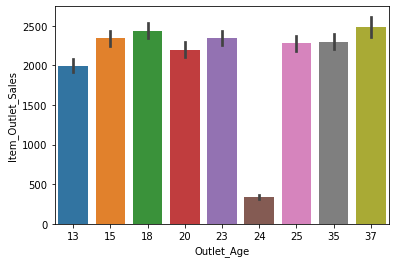

In [71]:
sns.barplot(x='Outlet_Age',y='Item_Outlet_Sales',data=df)

Now it's look quite find now. All the columns are similar sales after every 2 and 3 gap. But 24 age category column got less sales because every age columns have similar gap one by one, but age group 23 and 24 have not gap between them. 

let's visualize categorical feature first.

In [72]:
df=df.drop('Outlet_Establishment_Year',axis=1)
df.head(2)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,9.30,Low Fat,0.252232,Dairy,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380,23
1,5.92,Regular,0.268136,Soft Drinks,48.2692,Medium,Tier 3,Supermarket Type2,443.4228,13


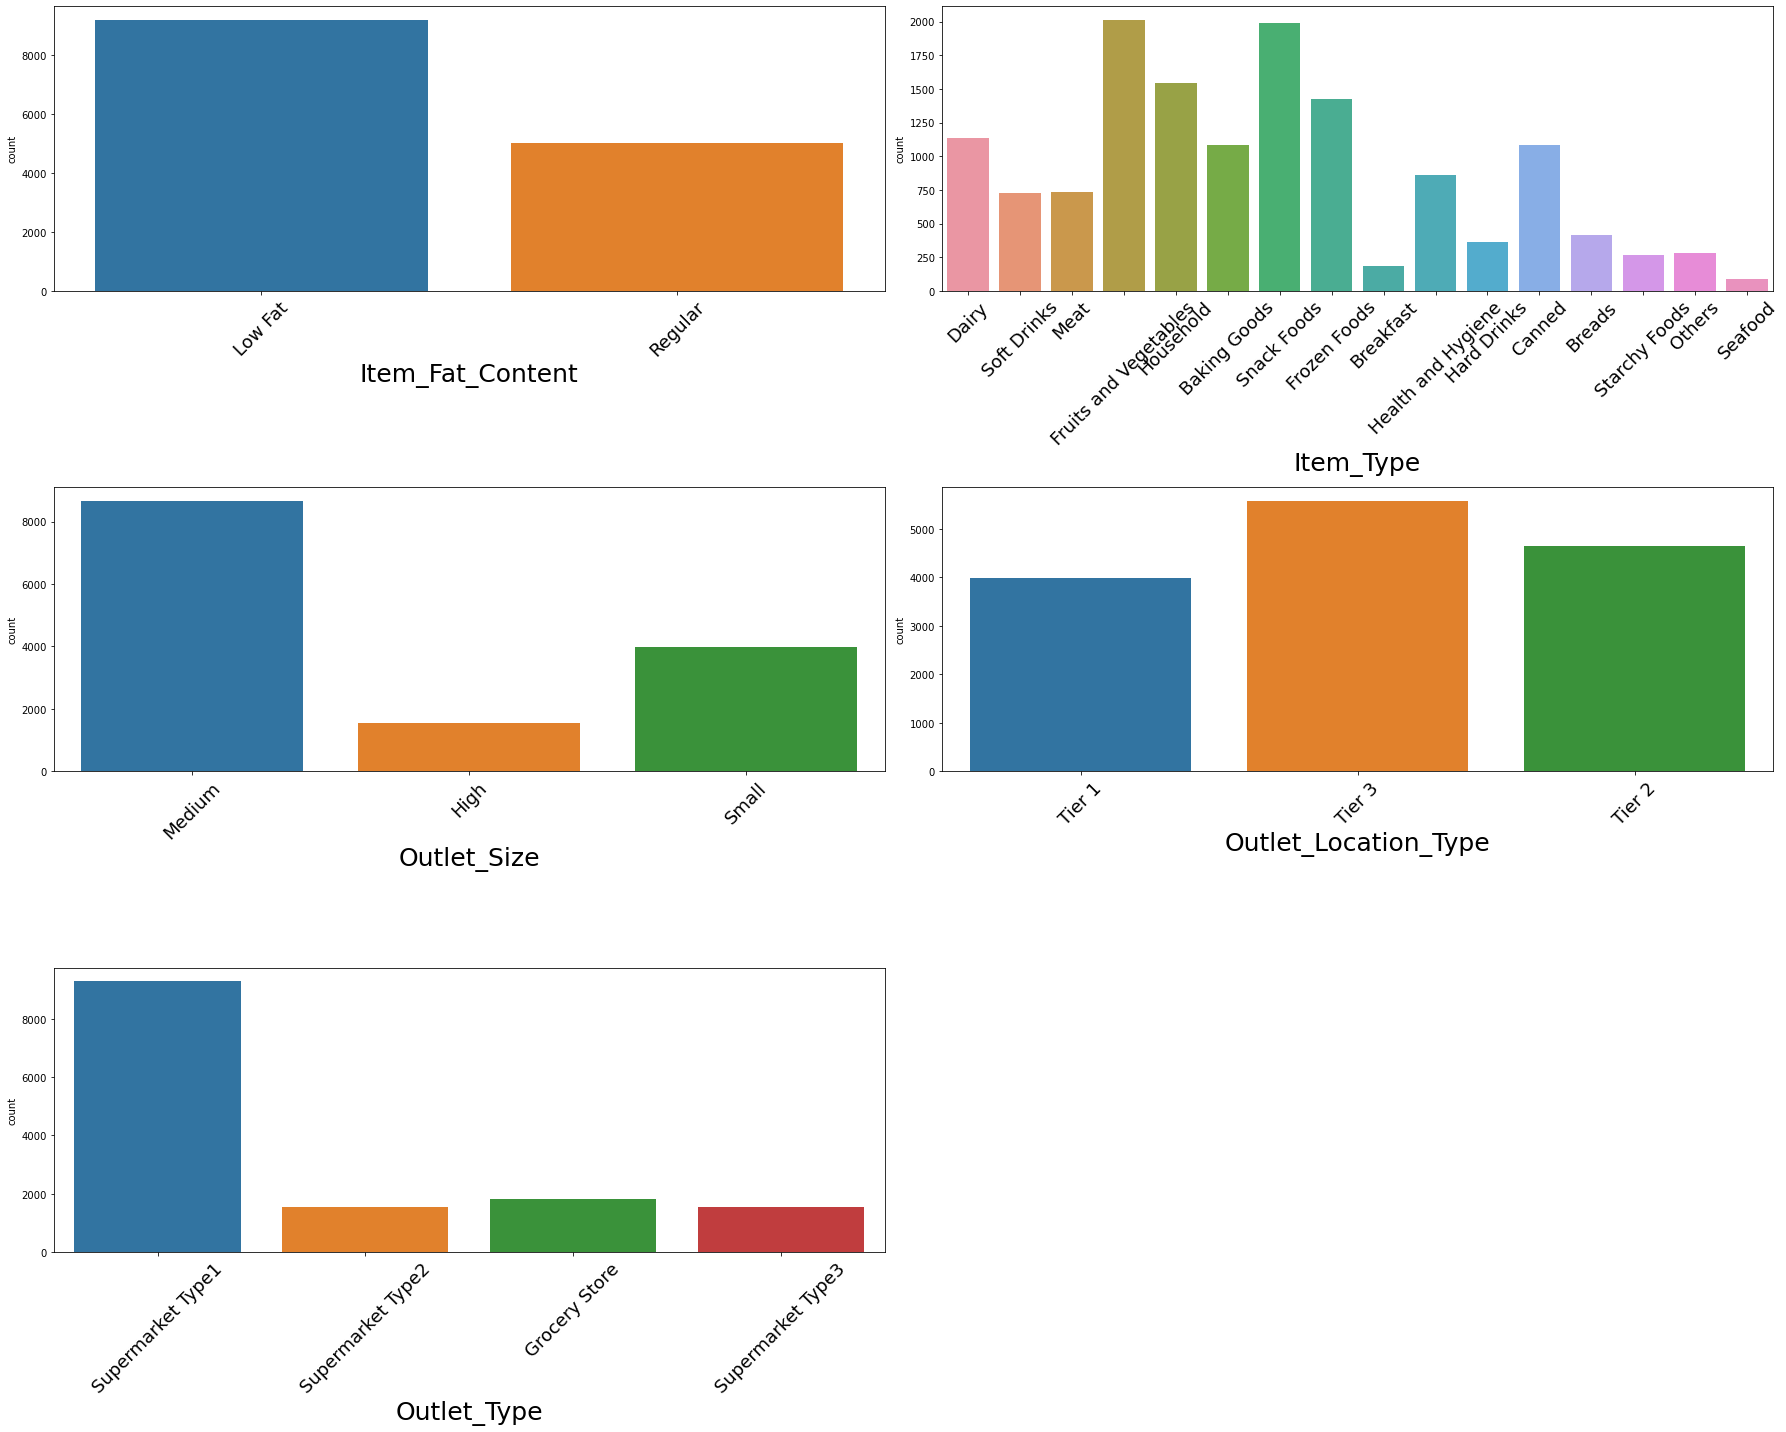

In [73]:
feature=[]
for i in df.columns:
    if df[i].dtype=='object':
        feature.append(i)

plt.figure(figsize=(25,20))

plotnumber=1
for column in feature:
    if plotnumber<=30:
        ax=plt.subplot(3,2,plotnumber)
        sns.countplot(x=column,data=df)
        plt.xlabel(column,fontsize=25)
        plt.xticks(rotation=45)
        plt.setp (ax.get_xticklabels (), fontsize=18)
    plotnumber+=1
plt.tight_layout()        

# Observation:
- `Item_Fat_Content` column show that mostly 'low_fat' items bought by maximum customers.
- `Item_Type` :-  Fruit, Baking-goods, snaks sold most.
- Medium size outlets visited by most customers.
- Mostly Tier3 city outlet location's sold most product.
- supermarket type1 markets visited by maximum custmores.

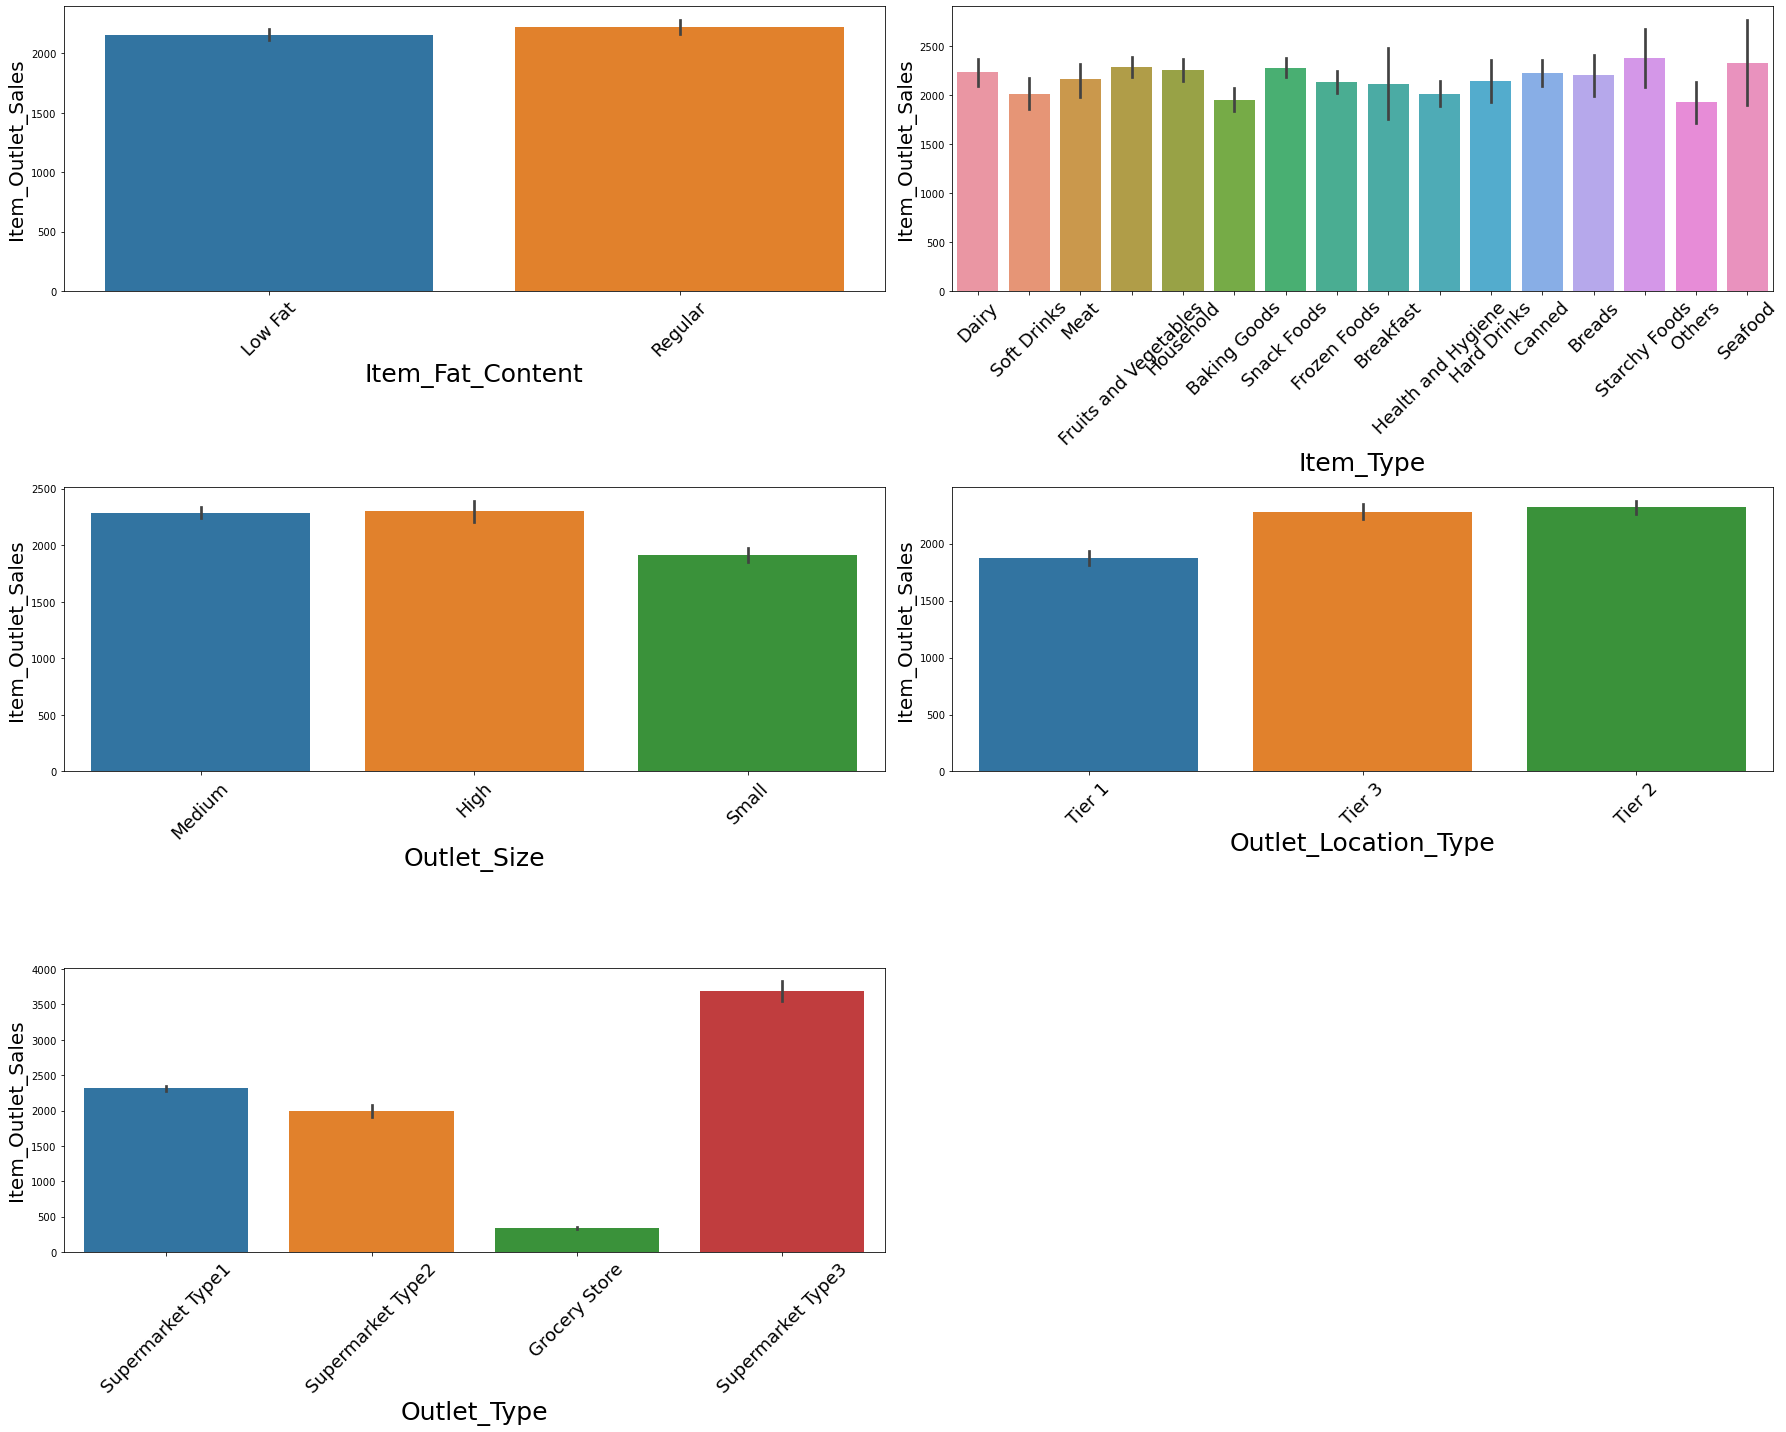

In [74]:
plt.figure(figsize=(25,20))

plotnumber=1
for column in feature:
    if plotnumber<=30:
        ax=plt.subplot(3,2,plotnumber)
        sns.barplot(x=column,y='Item_Outlet_Sales',data=df)
        plt.xlabel(column,fontsize=25)
        plt.ylabel('Item_Outlet_Sales',fontsize=20)
        plt.xticks(rotation=45)
        plt.setp (ax.get_xticklabels (), fontsize=18)
    plotnumber+=1
plt.tight_layout()

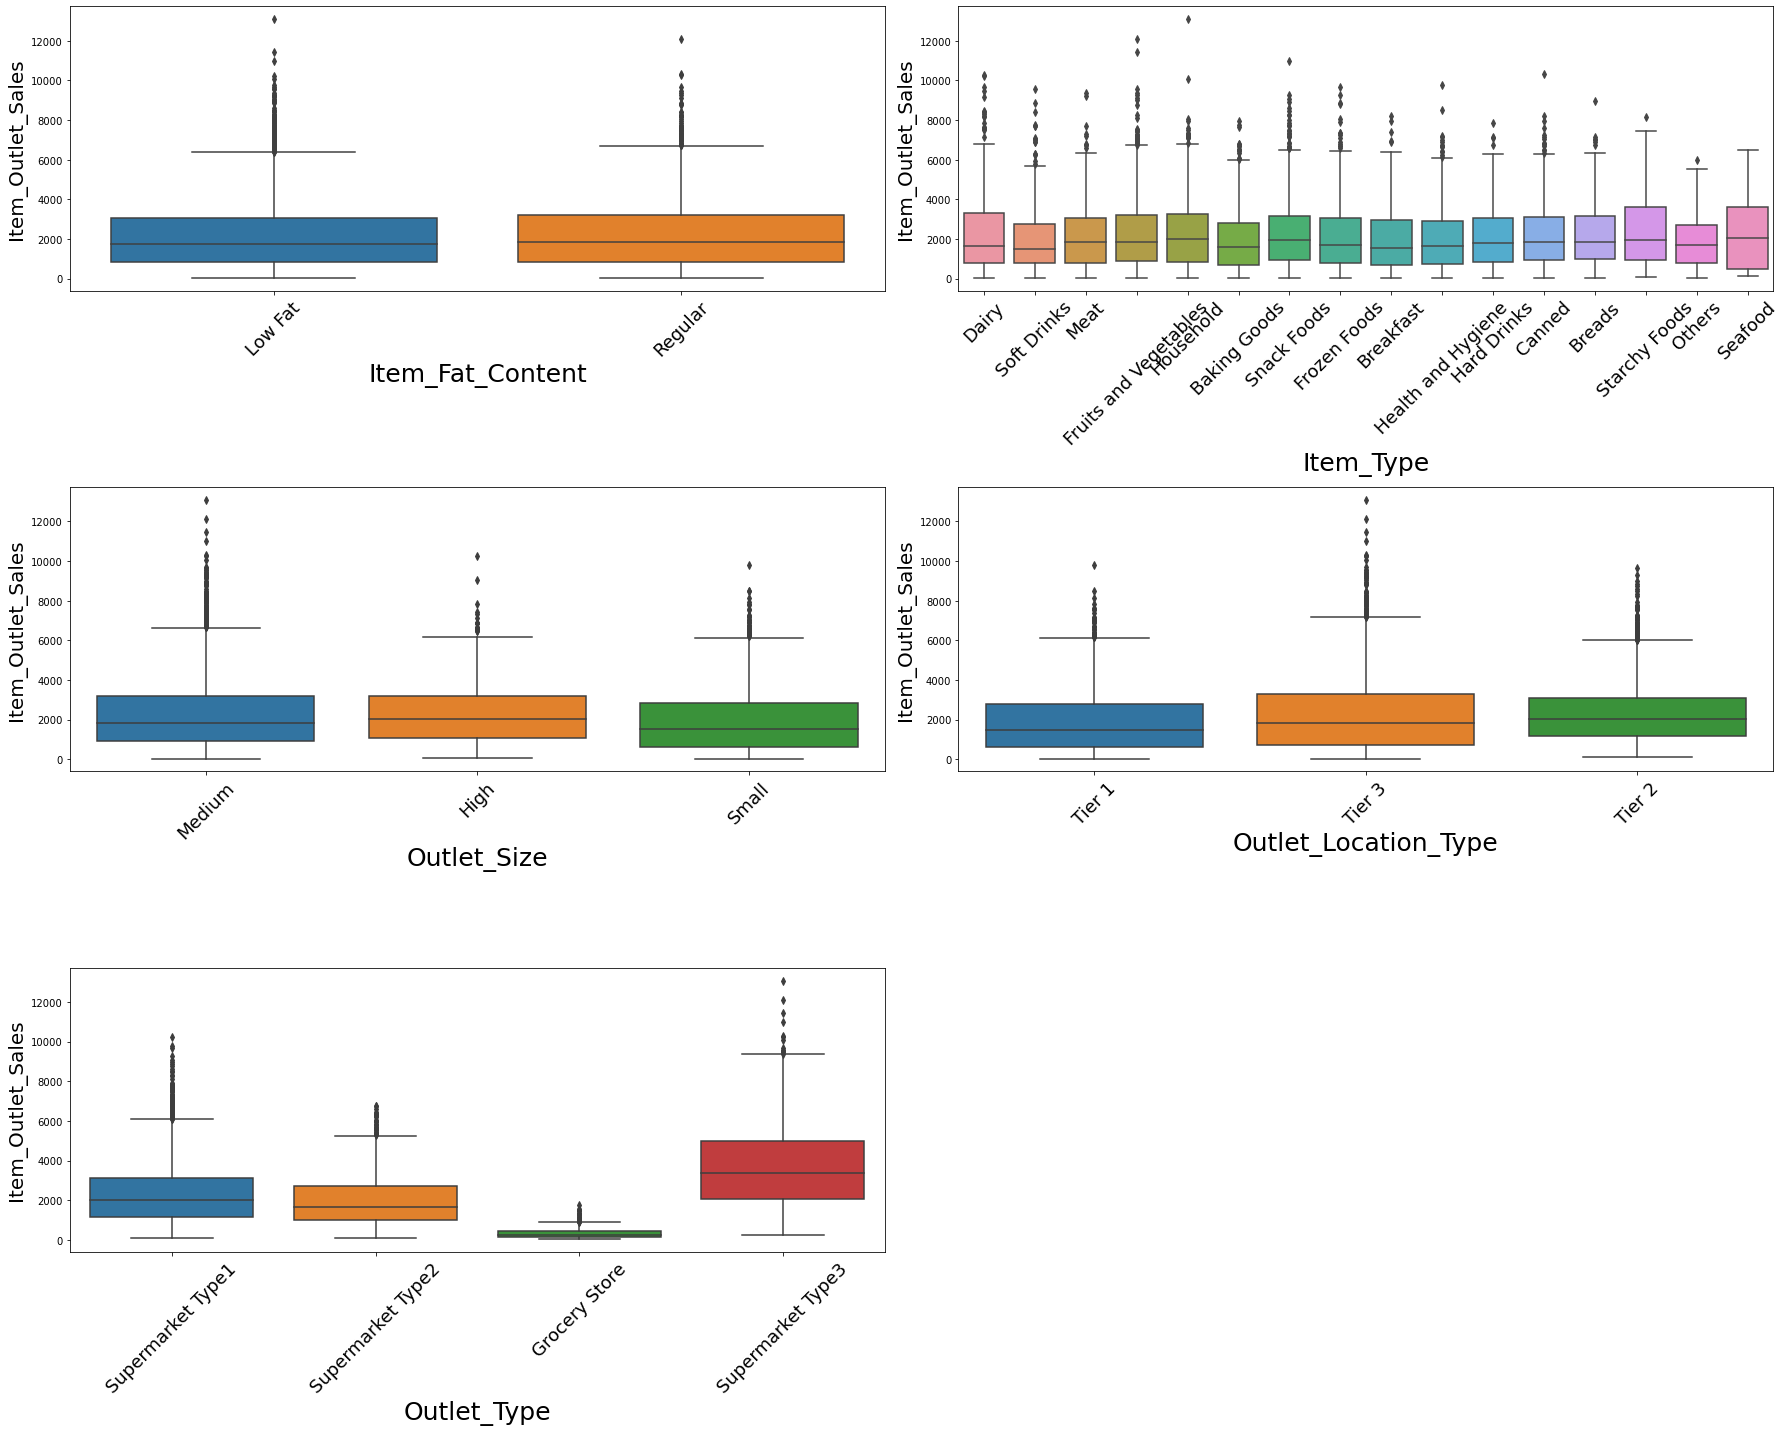

In [75]:
plt.figure(figsize=(25,20))

plotnumber=1
for column in feature:
    if plotnumber<=30:
        ax=plt.subplot(3,2,plotnumber)
        sns.boxplot(x=column,y='Item_Outlet_Sales',data=df)
        plt.xlabel(column,fontsize=25)
        plt.ylabel('Item_Outlet_Sales',fontsize=20)
        plt.xticks(rotation=45)
        plt.setp (ax.get_xticklabels (), fontsize=18)
    plotnumber+=1
plt.tight_layout()

# Observation:
- All the feature's type is equaly distributed with sales.
- In Exception Outlet_type column's supermarketType3 has got most sales and grocery stores have got minimum sales.

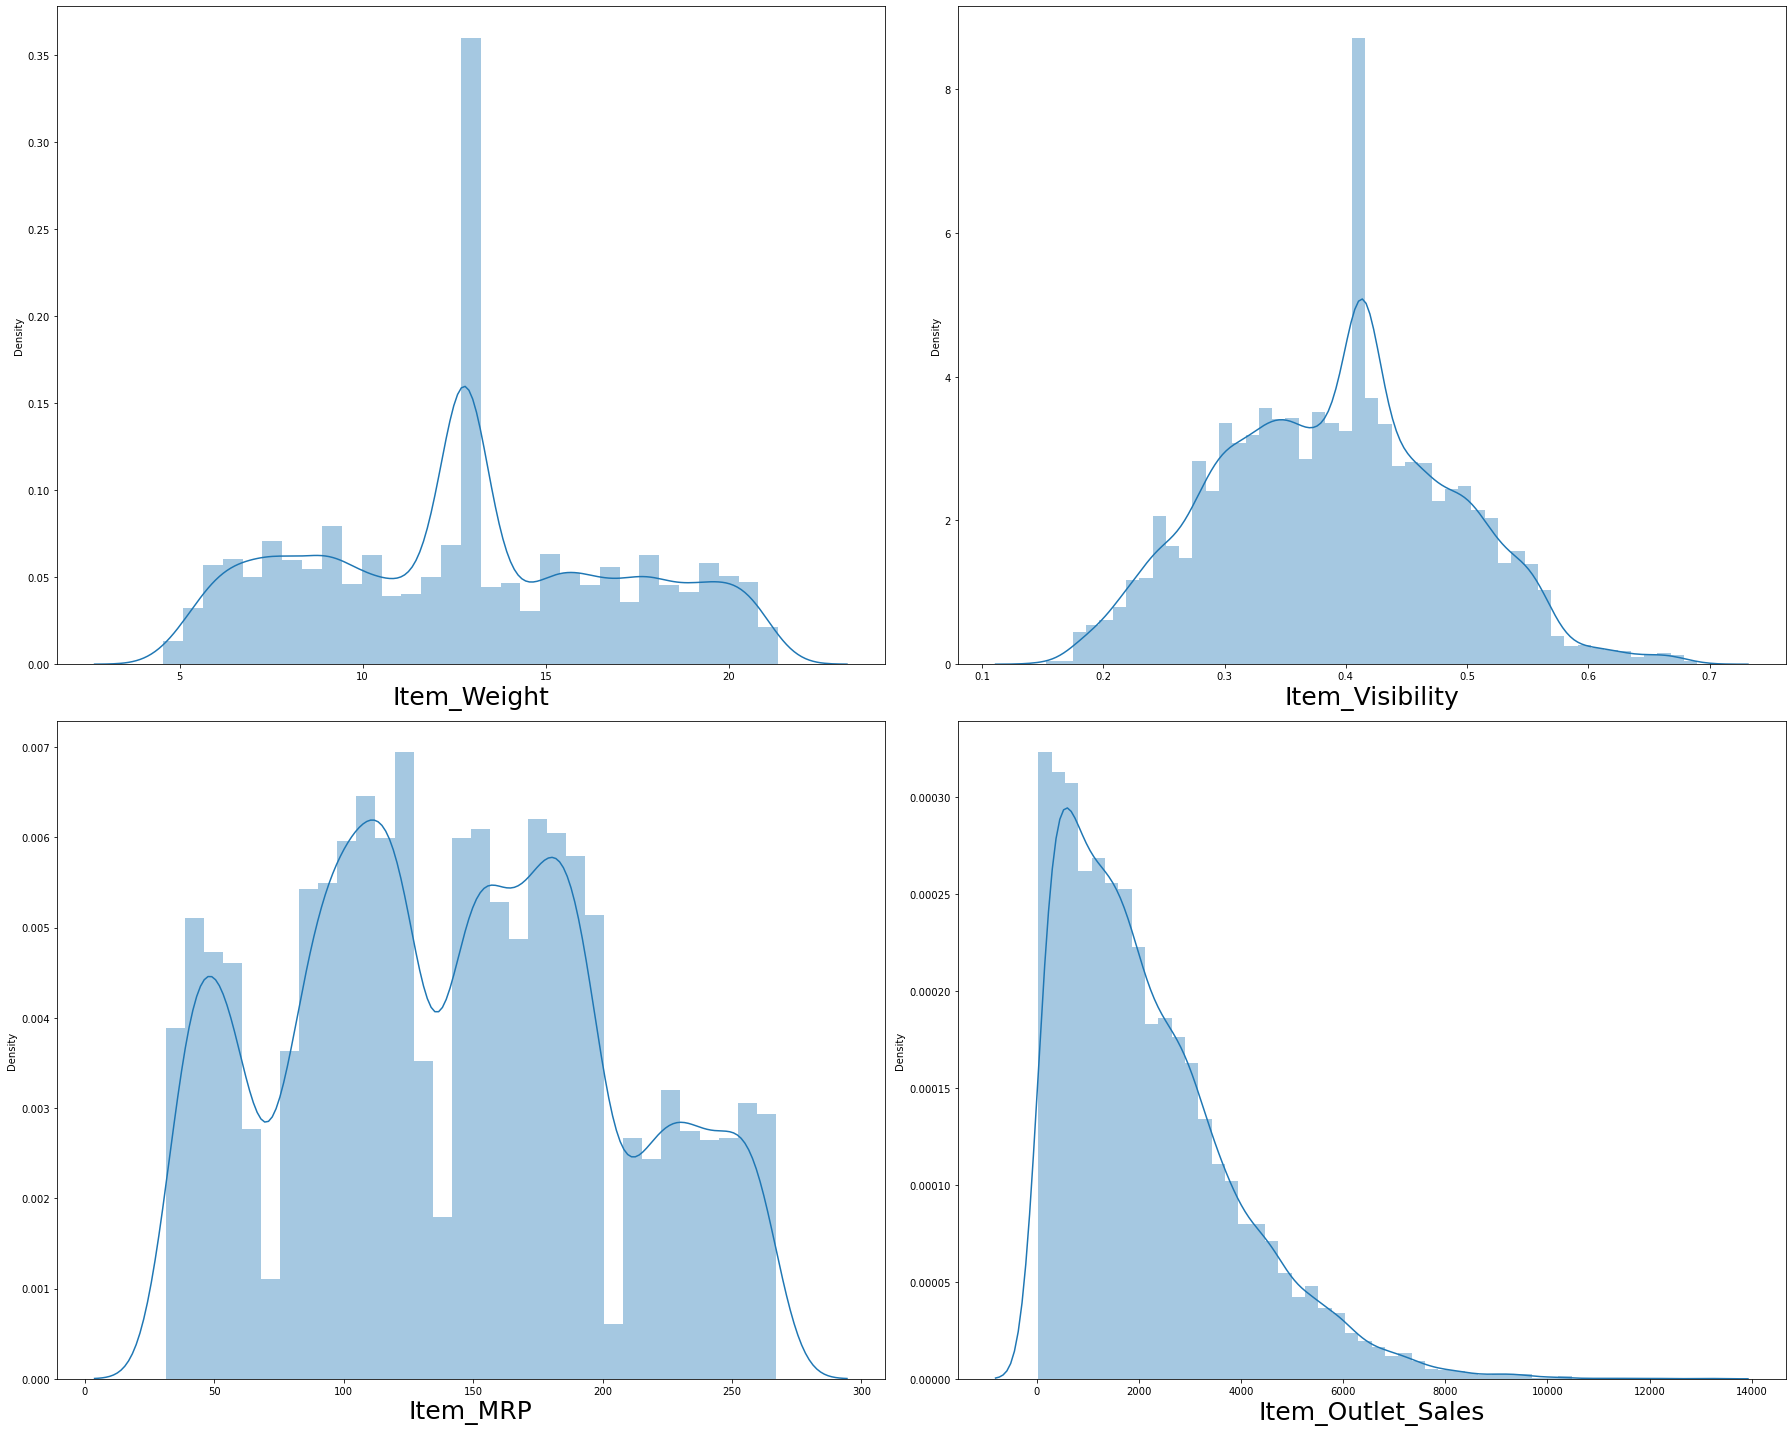

In [76]:
int_type_feature=['Item_Weight','Item_Visibility','Item_MRP','Item_Outlet_Sales']
plt.figure(figsize=(25,20))

plotnumber=1
for column in int_type_feature:
    if plotnumber<=30:
        ax=plt.subplot(2,2,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=25)
        
    plotnumber+=1
plt.tight_layout()

Now all the columns are quite well distributed.

# Plotting Heatmap

<AxesSubplot:>

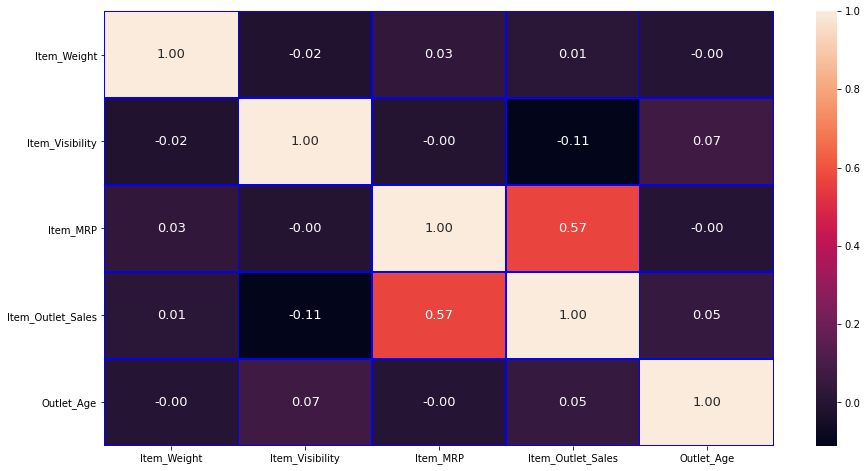

In [77]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True,annot_kws={'size':13},linewidths=0.2,linecolor='b',fmt='.2f')

- Because of our all columns  are not integer type that why we can't heatmap for them.
- Rest of the feature not much correlate with eachother.
- only Item_MRP and Item_Outlet_Sales columns show significant correlation.

# Feature Engineering.
- `Item_type` and `Outlet_Type`  columns are encoded by One Hot Encoding.
- `Outlet_Size`, `Outlet_Location_Type`, and `Item_Fat_Content` columns are encoded by get_dummies method.

In [78]:
import pandas as pd
df['Item_Type'].value_counts()

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

We can see that Item_Type column has 16 category food. We can group them according the domain knowledge.
- All foods are in one category:- Snack Foods, Frozen Foods, Baking Foods,Breakfast, Starchy Foods and Seafood.
- All Drinks are in one category:- Canned,Soft Drinks, Hard Drinks.
- All item those early desolated:- Fruits and Vegetables, Dairy,Health and Hygiene, Meat,Breads.
- rest of them are in different category:- Others,Household

In [79]:
df['Item_Type']=df['Item_Type'].replace({'Fruits and Vegetables':'Early Desolated','Snack Foods':'Food',
                                         'Household':'Other','Frozen Foods':'Food','Dairy':'Early Desolated',
                                         'Baking Goods':'Food','Canned':'Drink','Health and Hygiene':'Other',
                                         'Meat':'Early Desolated','Soft Drinks':'Drink','Breads':'Early Desolated',
                                         'Hard Drinks': 'Drink','Others':'Other','Starchy Foods':'Food','Breakfast':'Food',
                                         'Seafood':'Food'})
df['Item_Type'].value_counts()

Food               5045
Early Desolated    4301
Other              2686
Drink              2172
Name: Item_Type, dtype: int64

# One Hot Encoding
- Item_Type
- Outlet_Type

In [80]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

ohe=OneHotEncoder()
ct=make_column_transformer((ohe,['Item_Type','Outlet_Type']),
                          remainder='passthrough')

In [81]:
encoded=pd.DataFrame(ct.fit_transform(df))
encoded

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,9.3,Low Fat,0.252232,249.8092,Medium,Tier 1,3735.138,23
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.92,Regular,0.268136,48.2692,Medium,Tier 3,443.4228,13
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,17.5,Low Fat,0.255913,141.618,Medium,Tier 1,2097.27,23
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,19.2,Regular,0.412723,182.095,Medium,Tier 3,732.38,24
4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,8.93,Low Fat,0.412723,53.8614,High,Tier 3,994.7052,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,10.5,Regular,0.238089,141.3154,Small,Tier 1,NaN,25
14200,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,7.6,Regular,0.522921,169.1448,Medium,Tier 3,NaN,13
14201,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,10.0,Low Fat,0.41894,118.744,Medium,Tier 2,NaN,20
14202,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,15.3,Regular,0.412723,214.6218,Medium,Tier 2,NaN,15


In [82]:
column=encoded[[0,1,2,3,4,5,6,7]]
column=column.rename(columns={0:'Item_Type_Foods',1:'Item_Type_Early_De',2:'Item_Type_Others',3:'Item_Type_Drinks',
                              4:'Outlet_Type_1',5:'Outlet_Type_2',6:'Outlet_Type_Grocery',7:'Outlet_Type_3'})
column

,Item_Type_Foods,Item_Type_Early_De,Item_Type_Others,Item_Type_Drinks,Outlet_Type_1,Outlet_Type_2,Outlet_Type_Grocery,Outlet_Type_3
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
14199,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
14200,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
14201,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
14202,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [83]:
df=df.join(column)
df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age,Item_Type_Foods,Item_Type_Early_De,Item_Type_Others,Item_Type_Drinks,Outlet_Type_1,Outlet_Type_2,Outlet_Type_Grocery,Outlet_Type_3
0,9.30,Low Fat,0.252232,Early Desolated,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380,23,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,5.92,Regular,0.268136,Drink,48.2692,Medium,Tier 3,Supermarket Type2,443.4228,13,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,17.50,Low Fat,0.255913,Early Desolated,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700,23,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,19.20,Regular,0.412723,Early Desolated,182.0950,Medium,Tier 3,Grocery Store,732.3800,24,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,8.93,Low Fat,0.412723,Other,53.8614,High,Tier 3,Supermarket Type1,994.7052,35,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,10.50,Regular,0.238089,Food,141.3154,Small,Tier 1,Supermarket Type1,NaN,25,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
14200,7.60,Regular,0.522921,Food,169.1448,Medium,Tier 3,Supermarket Type2,NaN,13,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
14201,10.00,Low Fat,0.418940,Other,118.7440,Medium,Tier 2,Supermarket Type1,NaN,20,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
14202,15.30,Regular,0.412723,Drink,214.6218,Medium,Tier 2,Supermarket Type1,NaN,15,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [84]:
df=df.drop(columns=['Item_Type','Outlet_Type'])

# Get_Dummies

In [94]:
df1=pd.get_dummies(df[['Outlet_Size', 'Outlet_Location_Type','Item_Fat_Content']],drop_first=False)
df1

,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular
0,0,1,0,1,0,0,1,0
1,0,1,0,0,0,1,0,1
2,0,1,0,1,0,0,1,0
3,0,1,0,0,0,1,0,1
4,1,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...
14199,0,0,1,1,0,0,0,1
14200,0,1,0,0,0,1,0,1
14201,0,1,0,0,1,0,1,0
14202,0,1,0,0,1,0,0,1


In [97]:
df=df.join(df1)
df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Outlet_Age,Item_Type_Foods,Item_Type_Early_De,...,Outlet_Type_Grocery,Outlet_Type_3,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular
0,9.30,Low Fat,0.252232,249.8092,Medium,Tier 1,3735.1380,23,0.0,1.0,...,0.0,0.0,0,1,0,1,0,0,1,0
1,5.92,Regular,0.268136,48.2692,Medium,Tier 3,443.4228,13,1.0,0.0,...,1.0,0.0,0,1,0,0,0,1,0,1
2,17.50,Low Fat,0.255913,141.6180,Medium,Tier 1,2097.2700,23,0.0,1.0,...,0.0,0.0,0,1,0,1,0,0,1,0
3,19.20,Regular,0.412723,182.0950,Medium,Tier 3,732.3800,24,0.0,1.0,...,0.0,0.0,0,1,0,0,0,1,0,1
4,8.93,Low Fat,0.412723,53.8614,High,Tier 3,994.7052,35,0.0,0.0,...,0.0,0.0,1,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,10.50,Regular,0.238089,141.3154,Small,Tier 1,NaN,25,0.0,0.0,...,0.0,0.0,0,0,1,1,0,0,0,1
14200,7.60,Regular,0.522921,169.1448,Medium,Tier 3,NaN,13,0.0,0.0,...,1.0,0.0,0,1,0,0,0,1,0,1
14201,10.00,Low Fat,0.418940,118.7440,Medium,Tier 2,NaN,20,0.0,0.0,...,0.0,0.0,0,1,0,0,1,0,1,0
14202,15.30,Regular,0.412723,214.6218,Medium,Tier 2,NaN,15,1.0,0.0,...,0.0,0.0,0,1,0,0,1,0,0,1


In [98]:
#dropping the other useless column now
df=df.drop(columns=['Outlet_Size','Outlet_Location_Type','Item_Fat_Content'],axis=1)
print('Shape : ',df.shape)
df.head()

Shape :  (14204, 21)


,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Age,Item_Type_Foods,Item_Type_Early_De,Item_Type_Others,Item_Type_Drinks,Outlet_Type_1,...,Outlet_Type_Grocery,Outlet_Type_3,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular
0,9.30,0.252232,249.8092,3735.1380,23,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0,1,0,1,0,0,1,0
1,5.92,0.268136,48.2692,443.4228,13,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0,1,0,0,0,1,0,1
2,17.50,0.255913,141.6180,2097.2700,23,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0,1,0,1,0,0,1,0
3,19.20,0.412723,182.0950,732.3800,24,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0,1,0,0,0,1,0,1
4,8.93,0.412723,53.8614,994.7052,35,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1,0,0,0,0,1,1,0


# Scaling the Continuous data

In [124]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [125]:
df_scaled=scaler.fit_transform(df[['Item_Weight','Item_Visibility','Item_MRP']],)

In [126]:
x_df=pd.DataFrame(x_scaled,columns=['Item_Weight_scaled','Item_Visibility_scaled','Item_MRP_scaled'])
x_df
df=df.join(x_df)
df

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Age,Item_Type_Foods,Item_Type_Early_De,Item_Type_Others,Item_Type_Drinks,Outlet_Type_1,...,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Weight_scaled,Item_Visibility_scaled,Item_MRP_scaled
0,9.30,0.252232,249.8092,3735.1380,23,0.0,1.0,0.0,0.0,0.0,...,1,0,1,0,0,1,0,0.282525,0.184967,0.927507
1,5.92,0.268136,48.2692,443.4228,13,1.0,0.0,0.0,0.0,0.0,...,1,0,0,0,1,0,1,0.081274,0.214583,0.072068
2,17.50,0.255913,141.6180,2097.2700,23,0.0,1.0,0.0,0.0,0.0,...,1,0,1,0,0,1,0,0.770765,0.191821,0.468288
3,19.20,0.412723,182.0950,732.3800,24,0.0,1.0,0.0,0.0,1.0,...,1,0,0,0,1,0,1,0.871986,0.483825,0.640093
4,8.93,0.412723,53.8614,994.7052,35,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,1,1,0,0.260494,0.483825,0.095805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,10.50,0.238089,141.3154,NaN,25,0.0,0.0,1.0,0.0,0.0,...,0,1,1,0,0,0,1,0.353974,0.158631,0.467004
14200,7.60,0.522921,169.1448,NaN,13,0.0,0.0,1.0,0.0,0.0,...,1,0,0,0,1,0,1,0.181304,0.689029,0.585126
14201,10.00,0.418940,118.7440,NaN,20,0.0,0.0,0.0,1.0,0.0,...,1,0,0,1,0,1,0,0.324204,0.495401,0.371199
14202,15.30,0.412723,214.6218,NaN,15,1.0,0.0,0.0,0.0,0.0,...,1,0,0,1,0,0,1,0.639774,0.483825,0.778154


In [127]:
## Dropping the old columns
df=df.drop(columns=['Item_Weight','Item_Visibility','Item_MRP'])
df.head()

,Item_Outlet_Sales,Outlet_Age,Item_Type_Foods,Item_Type_Early_De,Item_Type_Others,Item_Type_Drinks,Outlet_Type_1,Outlet_Type_2,Outlet_Type_Grocery,Outlet_Type_3,...,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Weight_scaled,Item_Visibility_scaled,Item_MRP_scaled
0,3735.1380,23,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1,0,1,0,0,1,0,0.282525,0.184967,0.927507
1,443.4228,13,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1,0,0,0,1,0,1,0.081274,0.214583,0.072068
2,2097.2700,23,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1,0,1,0,0,1,0,0.770765,0.191821,0.468288
3,732.3800,24,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1,0,0,0,1,0,1,0.871986,0.483825,0.640093
4,994.7052,35,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0,0,0,0,1,1,0,0.260494,0.483825,0.095805


Before we proceed for model building..... We have to split our data for training and testing.

In [128]:
train_df=df.iloc[:8523]
print('Shape of the training dataset now : ',train_df.shape)
print('Checking the missing value in training dataset : \n', train_df.isnull().sum())
train_df.tail()

Shape of the training dataset now :  (8523, 21)
Checking the missing value in training dataset : 
 Item_Outlet_Sales              0
Outlet_Age                     0
Item_Type_Foods                0
Item_Type_Early_De             0
Item_Type_Others               0
Item_Type_Drinks               0
Outlet_Type_1                  0
Outlet_Type_2                  0
Outlet_Type_Grocery            0
Outlet_Type_3                  0
Outlet_Size_High               0
Outlet_Size_Medium             0
Outlet_Size_Small              0
Outlet_Location_Type_Tier 1    0
Outlet_Location_Type_Tier 2    0
Outlet_Location_Type_Tier 3    0
Item_Fat_Content_Low Fat       0
Item_Fat_Content_Regular       0
Item_Weight_scaled             0
Item_Visibility_scaled         0
Item_MRP_scaled                0
dtype: int64


,Item_Outlet_Sales,Outlet_Age,Item_Type_Foods,Item_Type_Early_De,Item_Type_Others,Item_Type_Drinks,Outlet_Type_1,Outlet_Type_2,Outlet_Type_Grocery,Outlet_Type_3,...,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Weight_scaled,Item_Visibility_scaled,Item_MRP_scaled
8518,2778.3834,35,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0,0,0,0,1,1,0,0.137541,0.431012,0.777729
8519,549.2850,20,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1,0,0,1,0,0,1,0.227746,0.387206,0.326263
8520,1193.1136,18,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0,1,0,1,0,1,0,0.359929,0.325473,0.228492
8521,1845.5976,13,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1,0,0,0,1,0,1,0.158083,0.694064,0.304939
8522,765.6700,25,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,1,1,0,0,1,0,0.610003,0.377022,0.187510


In [129]:
## Testing dataset
test_df=df.iloc[8523:]
test_df=test_df.reset_index(drop=True)
print('Shape of the testing dataset now : ',test_df.shape)
print('Checking the missing value in testing dataset : \n', test_df.isnull().sum())
test_df.head()

Shape of the testing dataset now :  (5681, 21)
Checking the missing value in testing dataset : 
 Item_Outlet_Sales              5681
Outlet_Age                        0
Item_Type_Foods                   0
Item_Type_Early_De                0
Item_Type_Others                  0
Item_Type_Drinks                  0
Outlet_Type_1                     0
Outlet_Type_2                     0
Outlet_Type_Grocery               0
Outlet_Type_3                     0
Outlet_Size_High                  0
Outlet_Size_Medium                0
Outlet_Size_Small                 0
Outlet_Location_Type_Tier 1       0
Outlet_Location_Type_Tier 2       0
Outlet_Location_Type_Tier 3       0
Item_Fat_Content_Low Fat          0
Item_Fat_Content_Regular          0
Item_Weight_scaled                0
Item_Visibility_scaled            0
Item_MRP_scaled                   0
dtype: int64


,Item_Outlet_Sales,Outlet_Age,Item_Type_Foods,Item_Type_Early_De,Item_Type_Others,Item_Type_Drinks,Outlet_Type_1,Outlet_Type_2,Outlet_Type_Grocery,Outlet_Type_3,...,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Weight_scaled,Item_Visibility_scaled,Item_MRP_scaled
0,NaN,23,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1,0,1,0,0,1,0,0.964275,0.080824,0.325012
1,NaN,15,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1,0,0,1,0,0,1,0.222983,0.343663,0.237819
2,NaN,24,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1,0,0,0,1,1,0,0.598095,0.578379,0.893316
3,NaN,15,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1,0,0,1,0,1,0,0.164335,0.178449,0.525233
4,NaN,37,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1,0,0,0,1,0,1,0.490494,0.630175,0.861381


In [130]:
## Droping the target variable from testing dataset.
test_df=test_df.drop('Item_Outlet_Sales',axis=1)
test_df.isna().sum()

Outlet_Age                     0
Item_Type_Foods                0
Item_Type_Early_De             0
Item_Type_Others               0
Item_Type_Drinks               0
Outlet_Type_1                  0
Outlet_Type_2                  0
Outlet_Type_Grocery            0
Outlet_Type_3                  0
Outlet_Size_High               0
Outlet_Size_Medium             0
Outlet_Size_Small              0
Outlet_Location_Type_Tier 1    0
Outlet_Location_Type_Tier 2    0
Outlet_Location_Type_Tier 3    0
Item_Fat_Content_Low Fat       0
Item_Fat_Content_Regular       0
Item_Weight_scaled             0
Item_Visibility_scaled         0
Item_MRP_scaled                0
dtype: int64

# Splitting Features and Label from Training dataset.

In [134]:
x=train_df.drop('Item_Outlet_Sales',axis=1)
y=train_df['Item_Outlet_Sales']


# Model Building:

### `:- Linear Regression`

In [135]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split as tts

import warnings
warnings.filterwarnings('ignore')

In [139]:
## finding the best random state
for i in range(1,101):
    x_train,x_test,y_train,y_test=tts(x,y,test_size=0.25,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    #print('At random state {} the training score is : {} '.format(i,r2_score(y_train,pred_train)))
    #print('At random state {} the testing score is : {} '.format(i,r2_score(y_test,pred_test)))
    #print('\n')
    if round(r2_score(y_train,pred_train)*100,1)==round(r2_score(y_test,pred_test)*100,1):
        print("At random state", i , "The model performs very well")
        print("At random state ", i)
        print("Training accuracy is : ", r2_score(y_train,pred_train)*100)
        print("Testing r2 score is : ", r2_score(y_test,pred_test)*100)
        print('\n')

At random state 16 The model performs very well
At random state  16
Training accuracy is :  56.287645087174255
Testing r2 score is :  56.285672438802926


At random state 40 The model performs very well
At random state  40
Training accuracy is :  56.2756525511126
Testing r2 score is :  56.26430188028092


At random state 52 The model performs very well
At random state  52
Training accuracy is :  56.28055514699426
Testing r2 score is :  56.27258210987212


At random state 53 The model performs very well
At random state  53
Training accuracy is :  56.31035401563824
Testing r2 score is :  56.2606132449164


At random state 85 The model performs very well
At random state  85
Training accuracy is :  56.293484344272905
Testing r2 score is :  56.25997898690047




we can see in the above output all the scores are allmost same at all output random state. so random state=52 selected.

In [140]:
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.25,random_state=52)

In [141]:
lr.fit(x_train,y_train)

LinearRegression()

In [142]:
pred_test=lr.predict(x_test)

In [143]:
print(r2_score(y_test,pred_test)*100)

56.27258210987212


# Cross Validation for Linear Regression:

In [144]:
pred_lr=lr.predict(x_test)
from sklearn.model_selection import cross_val_score
test_score= r2_score(y_test,pred_lr)
for i in range(2,21):
    lrscore=cross_val_score(lr,x,y,cv=i)
    lsc=lrscore.mean()
    print("at cv :-",i)
    print("cross validation score is ", lsc)
    print("Testing score is ", test_score)
    print('\n')

at cv :- 2
cross validation score is  0.5606362598785954
Testing score is  0.5627258210987212


at cv :- 3
cross validation score is  0.561061976986941
Testing score is  0.5627258210987212


at cv :- 4
cross validation score is  0.5599191749569294
Testing score is  0.5627258210987212


at cv :- 5
cross validation score is  0.5608820064617153
Testing score is  0.5627258210987212


at cv :- 6
cross validation score is  0.5607245261027817
Testing score is  0.5627258210987212


at cv :- 7
cross validation score is  0.5612877871379324
Testing score is  0.5627258210987212


at cv :- 8
cross validation score is  0.5607795020408203
Testing score is  0.5627258210987212


at cv :- 9
cross validation score is  0.5607929497883888
Testing score is  0.5627258210987212


at cv :- 10
cross validation score is  0.5602847773004961
Testing score is  0.5627258210987212


at cv :- 11
cross validation score is  0.5606991783039347
Testing score is  0.5627258210987212


at cv :- 12
cross validation score is  

There are not much difference between cv score and testing score i.e. our model are not overfit. now cv=7 selected.

In [145]:
cv_score=cross_val_score(lr,x,y,cv=7).mean()
print("After checking the overfitting, my new Score of our model is :- ", cv_score)

After checking the overfitting, my new Score of our model is :-  0.5612877871379324


# Let's plot it for better understanding.

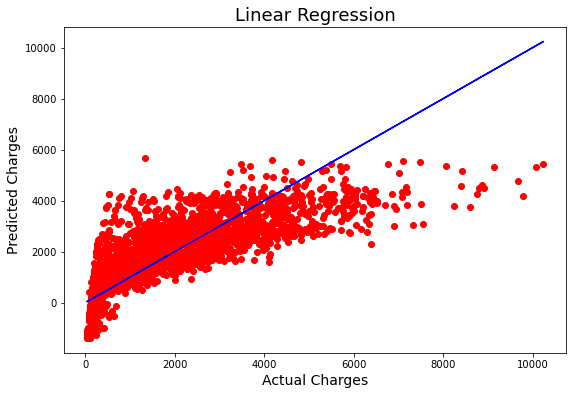

In [147]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,6))
plt.scatter(x=y_test,y=pred_lr,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Charges', fontsize=14)
plt.ylabel('Predicted Charges',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()

# Regularization:

In [149]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso


In [152]:
ls=Lasso()
parameter={'alpha':[0.0001,0.001,0.01,0.1,1,10],'random_state':list(range(0,11)),'max_iter':list(range(1,102,10))}
clf=GridSearchCV(ls,parameter)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 0.1, 'max_iter': 101, 'random_state': 0}


In [154]:
ls=Lasso(alpha=0.1,max_iter=101,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)
print('The final Score is : -')
ls_score=r2_score(y_test,pred_ls)
ls_score

The final Score is : -


0.5623181192610253

In [156]:
cv_mean=cross_val_score(ls,x,y,cv=7)
cv_score=cv_mean.mean()
print('Cross Validation score is : ')
cv_score

Cross Validation score is : 


0.561230857339652

In [177]:
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [178]:
y_pred=ls.predict(x_test)
print('The mean abbsolute error of the model is :- ',mean_absolute_error(y_test,y_pred))
print('The mean_squared_error of the model is :- ',mean_squared_error(y_test,y_pred))
print('The Squareroot of Mean square error is :- ', np.sqrt(mean_squared_error(y_test,y_pred)))

The mean abbsolute error of the model is :-  824.4092535841849
The mean_squared_error of the model is :-  1224643.9729512858
The Squareroot of Mean square error is :-  1106.6363327449926


# Random Forest Regressor:

In [157]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()

In [159]:
## finding the best random state
for i in range(1,101):
    x_train,x_test,y_train,y_test=tts(x,y,test_size=0.25,random_state=i)
    rf.fit(x_train,y_train)
    pred_train=rf.predict(x_train)
    pred_test=rf.predict(x_test)
    print('At random state {} the training score is : {} '.format(i,r2_score(y_train,pred_train)))
    print('At random state {} the testing score is : {} '.format(i,r2_score(y_test,pred_test)))
    print('At random state {} the difference between traning and testing score is : {}'.format(i,(r2_score(y_train,pred_train))*100-r2_score(y_test,pred_test)*100))
    print('\n')

At random state 1 the training score is : 0.938278789950986 
At random state 1 the testing score is : 0.5611286840676015 
At random state 1 the difference between traning and testing score is : 37.71501058833845


At random state 2 the training score is : 0.9375021274967298 
At random state 2 the testing score is : 0.5625885372083095 
At random state 2 the difference between traning and testing score is : 37.491359028842034


At random state 3 the training score is : 0.9363371236163553 
At random state 3 the testing score is : 0.5768574791127989 
At random state 3 the difference between traning and testing score is : 35.947964450355634


At random state 4 the training score is : 0.936337751796771 
At random state 4 the testing score is : 0.5443062661768154 
At random state 4 the difference between traning and testing score is : 39.20314856199556


At random state 5 the training score is : 0.9363438837726226 
At random state 5 the testing score is : 0.5523006280857683 
At random state 5

At random state 39 the difference between training and testing score is very  less so random state 39 is  selected.

In [170]:
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.25,random_state=39)
rf.fit(x_train,y_train)

RandomForestRegressor()

In [171]:
pred_test=rf.predict(x_test)

In [172]:
pred_score=r2_score(y_test,pred_test)
pred_score

0.5891198319961248

# Checking Cross validation 

In [174]:
pred_test=rf.predict(x_test)
from sklearn.model_selection import cross_val_score
test_score= r2_score(y_test,pred_test)
for i in range(2,21):
    rfscore=cross_val_score(rf,x,y,cv=i,)
    rfc=rfscore.mean()
    print("at cv :-",i)
    print("cross validation score is ", rfc*100)
    print("Testing score is ", test_score*100)
    print('The difference of CVscore and testing score  is : ', (test_score-rfc)*100)
    print('\n')

at cv :- 2
cross validation score is  54.17712865781629
Testing score is  58.911983199612486
The difference of CVscore and testing score  is :  4.734854541796196


at cv :- 3
cross validation score is  54.42925169041065
Testing score is  58.911983199612486
The difference of CVscore and testing score  is :  4.482731509201832


at cv :- 4
cross validation score is  54.60467775861761
Testing score is  58.911983199612486
The difference of CVscore and testing score  is :  4.307305440994869


at cv :- 5
cross validation score is  54.742080933513314
Testing score is  58.911983199612486
The difference of CVscore and testing score  is :  4.169902266099168


at cv :- 6
cross validation score is  55.191195292643236
Testing score is  58.911983199612486
The difference of CVscore and testing score  is :  3.7207879069692473


at cv :- 7
cross validation score is  55.06242727663114
Testing score is  58.911983199612486
The difference of CVscore and testing score  is :  3.8495559229813403


at cv :- 8
c

At cv=19 difference between cv score and testing score is very less.

In [175]:
cv_score=cross_val_score(rf,x,y,cv=19).mean()
print("After checking the overfitting, my new Score of our model is :- ", cv_score)

After checking the overfitting, my new Score of our model is :-  0.550936982240316


# Let's plot it for better understanding.

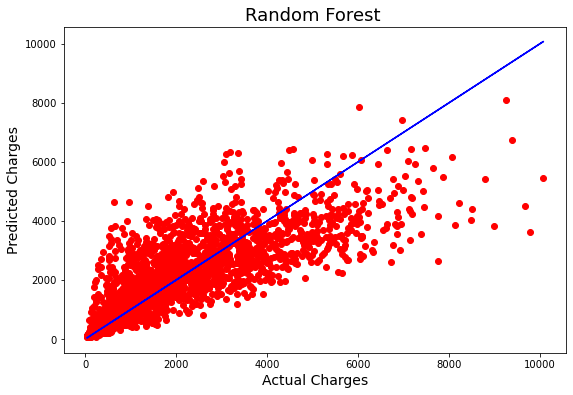

In [176]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,6))
plt.scatter(x=y_test,y=pred_test,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Charges', fontsize=14)
plt.ylabel('Predicted Charges',fontsize=14)
plt.title('Random Forest ',fontsize=18)
plt.show()

# let's Tune the Parameter:

In [180]:
from sklearn.model_selection import RandomizedSearchCV
 
parameters={'criterion':['mse','mae'],'max_features':['auto','sqrt','log2'],'n_estimators':list(range(0,100)),'max_depth':list(range(2,8))}
rf=RandomForestRegressor()
clf=RandomizedSearchCV(rf,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'n_estimators': 90, 'max_features': 'log2', 'max_depth': 7, 'criterion': 'mse'}


In [183]:
rf=RandomForestRegressor(n_estimators=90,max_features='log2',max_depth=7,criterion='mse')
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
prediction=rf.predict(x_test)

rfscore=r2_score(y_test,prediction)

print('R2 Score ', rfscore*100)

R2 Score  56.38383654662136


In [184]:
cv_mean=cross_val_score(rf,x,y,cv=19)
cv_score=cv_mean.mean()
print('Cross Validation score is : ')
cv_score

Cross Validation score is : 


0.5560345443402319

In [185]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print('The mean abbsolute error of the model is :- ',mean_absolute_error(y_test,prediction))
print('The mean_squared_error of the model is :- ',mean_squared_error(y_test,prediction))
print('The Squareroot of Mean square error is :- ', np.sqrt(mean_squared_error(y_test,prediction)))

The mean abbsolute error of the model is :-  825.0243320411522
The mean_squared_error of the model is :-  1279308.8986032275
The Squareroot of Mean square error is :-  1131.0653821080493


# KNeighbors Regressor:

In [206]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()

In [207]:
## finding the best random state
for i in range(1,101):
    x_train,x_test,y_train,y_test=tts(x,y,test_size=0.25,random_state=i)
    knn.fit(x_train,y_train)
    pred_train=knn.predict(x_train)
    pred_test=knn.predict(x_test)
    print('At random state {} the training score is : {} '.format(i,r2_score(y_train,pred_train)))
    print('At random state {} the testing score is : {} '.format(i,r2_score(y_test,pred_test)))
    print('At random state {} the difference between traning and testing score is : {}'.format(i,(r2_score(y_train,pred_train))*100-r2_score(y_test,pred_test)*100))
    print('\n')

At random state 1 the training score is : 0.6683827431392386 
At random state 1 the testing score is : 0.5131063579397659 
At random state 1 the difference between traning and testing score is : 15.527638519947274


At random state 2 the training score is : 0.6788117787150456 
At random state 2 the testing score is : 0.5205228489868906 
At random state 2 the difference between traning and testing score is : 15.828892972815503


At random state 3 the training score is : 0.666668705406216 
At random state 3 the testing score is : 0.5343574975918732 
At random state 3 the difference between traning and testing score is : 13.231120781434278


At random state 4 the training score is : 0.6768033778475433 
At random state 4 the testing score is : 0.49081029048864 
At random state 4 the difference between traning and testing score is : 18.599308735890332


At random state 5 the training score is : 0.674062507347209 
At random state 5 the testing score is : 0.5138503646845678 
At random state 5

Random state 67 is selected.

In [210]:
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.25,random_state=67)
knn.fit(x_train,y_train)
pred_test=knn.predict(x_test)

In [212]:
print('R2 Score : ', r2_score(y_test,pred_test))

R2 Score :  0.5458058678505873


In [213]:
## Checking Cv for the model
from sklearn.model_selection import cross_val_score
test_score= r2_score(y_test,pred_test)
for i in range(2,21):
    knnscore=cross_val_score(knn,x,y,cv=i,)
    knncv=knnscore.mean()
    print("at cv :-",i)
    print("cross validation score is ", knncv*100)
    print("Testing score is ", test_score*100)
    print('The difference of CVscore and testing score  is : ', (test_score-knncv)*100)
    print('\n')

at cv :- 2
cross validation score is  50.81351972470929
Testing score is  54.58058678505873
The difference of CVscore and testing score  is :  3.7670670603494383


at cv :- 3
cross validation score is  51.45774379837474
Testing score is  54.58058678505873
The difference of CVscore and testing score  is :  3.1228429866839824


at cv :- 4
cross validation score is  51.241854243190524
Testing score is  54.58058678505873
The difference of CVscore and testing score  is :  3.3387325418682057


at cv :- 5
cross validation score is  50.955563260957334
Testing score is  54.58058678505873
The difference of CVscore and testing score  is :  3.6250235241013895


at cv :- 6
cross validation score is  51.48778764776242
Testing score is  54.58058678505873
The difference of CVscore and testing score  is :  3.0927991372963093


at cv :- 7
cross validation score is  51.41121867935771
Testing score is  54.58058678505873
The difference of CVscore and testing score  is :  3.1693681057010203


at cv :- 8
cro

cv=6 selected.

In [214]:
cv_score=cross_val_score(knn,x,y,cv=6).mean()
print("After checking the overfitting, my new Score of our model is :- ", cv_score)

After checking the overfitting, my new Score of our model is :-  0.5148778764776242


# Let's plot it for better understanding.

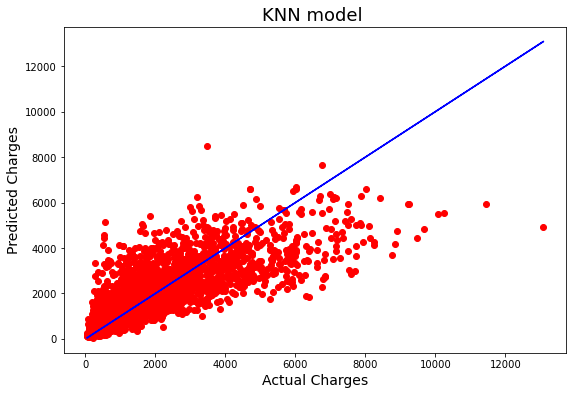

In [215]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,6))
plt.scatter(x=y_test,y=pred_test,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Charges', fontsize=14)
plt.ylabel('Predicted Charges',fontsize=14)
plt.title('KNN model ',fontsize=18)
plt.show()

# Hyperparameter tunning:"

In [216]:
# let's Tune the Parameter:
from sklearn.model_selection import GridSearchCV
 
param_grid={'algorithm':['kd_tree','brute'],
           'leaf_size':list(range(6,12)),
           'n_neighbors':[3,5,7,9,11,13]}


In [217]:
grid_search=GridSearchCV(estimator=knn,param_grid=param_grid)
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['kd_tree', 'brute'],
                         'leaf_size': [6, 7, 8, 9, 10, 11],
                         'n_neighbors': [3, 5, 7, 9, 11, 13]})

In [218]:
grid_search.best_params_

{'algorithm': 'kd_tree', 'leaf_size': 6, 'n_neighbors': 13}

In [219]:
knn=KNeighborsRegressor(algorithm='kd_tree',leaf_size=6,n_neighbors=13)
knn.fit(x_train,y_train)
pred_test=knn.predict(x_test)

In [220]:
print('R2 Score: ',r2_score(y_test,pred_test))

R2 Score:  0.5686232236281016


In [221]:
cv_mean=cross_val_score(knn,x,y,cv=6)
cv_score=cv_mean.mean()
print('Cross Validation score is : ')
cv_score

Cross Validation score is : 


0.5560522635265979

In [222]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print('The mean abbsolute error of the model is :- ',mean_absolute_error(y_test,pred_test))
print('The mean_squared_error of the model is :- ',mean_squared_error(y_test,pred_test))
print('The Squareroot of Mean square error is :- ', np.sqrt(mean_squared_error(y_test,pred_test)))

The mean abbsolute error of the model is :-  821.3768368552143
The mean_squared_error of the model is :-  1367540.7263940927
The Squareroot of Mean square error is :-  1169.4189695716811


# KNeighbors Regressor gives us The best result.
# Saving that model.

In [223]:
import pickle
filename='big_mart_data.pkl'
pickle.dump(knn,open(filename,'wb'))

# Use Knn model on Testing Dataset:

In [224]:
test_df

,Outlet_Age,Item_Type_Foods,Item_Type_Early_De,Item_Type_Others,Item_Type_Drinks,Outlet_Type_1,Outlet_Type_2,Outlet_Type_Grocery,Outlet_Type_3,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Weight_scaled,Item_Visibility_scaled,Item_MRP_scaled
0,23,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0,1,0,1,0,0,1,0,0.964275,0.080824,0.325012
1,15,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0,1,0,0,1,0,0,1,0.222983,0.343663,0.237819
2,24,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0,1,0,0,0,1,1,0,0.598095,0.578379,0.893316
3,15,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0,1,0,0,1,0,1,0,0.164335,0.178449,0.525233
4,37,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1,0,0,0,1,0,1,0.490494,0.630175,0.861381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,25,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0,0,1,1,0,0,0,1,0.353974,0.158631,0.467004
5677,13,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0,1,0,0,0,1,0,1,0.181304,0.689029,0.585126
5678,20,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0,1,0,0,1,0,1,0,0.324204,0.495401,0.371199
5679,15,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,1,0,0,1,0,0,1,0.639774,0.483825,0.778154


In [225]:
test_pred=knn.predict(test_df)

In [228]:
test_pred_df=pd.DataFrame(test_pred)

In [229]:
test_pred_df

,0
0,2093.223985
1,1666.446185
2,735.811431
3,2475.546831
4,4845.589969
...,...
5676,2554.930677
5677,2315.089031
5678,1849.746046
5679,3549.174938
